## 1CA Machine Learning

### Student Name: 
### Emily Cristina Herbas Luizaga (2023100)
### Mijail Fausto Blanco Vargas (2023012)

### PROBLEM STATEMENT

#### In the following CA project, we want to know the prediction of positive Covid cases registered in the dataset in Europe ("WHO Region"). In this dataset, we have different continents, countries and variables about Covid cases that will help us determine the predictions we want to know. The dataset was taken from kaggle analyzing different countries collecting data from the beginning of January 2020 until July 2020. To knoe the prediction of positive Covid cases is primordial since we need to know an stimate of positive covid cases for knowing how is the pandemy spreding around the world and this information could be useful for the countries to know if they need more medical attention, to have hospitals available or possible treatments for the people infected.

In [1]:
# Importing libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets
df_cl = pd.read_csv('covid_19_clean_complete.csv')
df_world = pd.read_csv('worldometer_data.csv')

In [3]:
# Merging datasets
cov_df = df_cl.merge(df_world[["Country/Region", "Continent"]], on="Country/Region", how='left')
cov_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,Africa


We loaded the datasets and merged the columns needed for the analysis.

## Characterization of the Covid Dataset

In [4]:
#Analysing the columns dtype and NaN values
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
 10  Continent       38164 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ MB


We have 11 columns in the dataset in which 2 of them are continuous numerical variables, 4 are discrete numerical variables and 5 are categorical variables.

In [5]:
cov_df.shape

(49068, 11)

The shape of our dataset has 49068 rows and 11 columns and now let's proceed with Data cleaning before performing any Machine Learning modelling.

In [6]:
#Showing the insights of the numerical values
cov_df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In the dataset we can appreciate some details as latitude, and longitude which show us where is every country located, and a collection of confirmed, deaths, recovered, and active cases of Covid.

In [7]:
#Showing the insights of the categorical values
cov_df.describe(include='object')

,Province/State,Country/Region,Date,WHO Region,Continent
count,14664,49068,49068,49068,38164
unique,78,187,188,6,6
top,Australian Capital Territory,China,2020-01-22,Europe,Europe
freq,188,6204,261,15040,10528


In our categorical variables, we can see that we have 187 countries in our dataset

## Data Cleaning

In [8]:
# Dropping duplicates
cov_df.drop_duplicates()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,Asia
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,Asia


In [9]:
# Showing the shape of the dataframe after dropping duplicates
cov_df.shape

(49068, 11)

The number of rows didn't change after dropping duplicates, and this means that our data doesn't have duplicates inside and in the following code we are going to standarize the NaN values.

In [10]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--"]
cov_df = cov_df.replace(missing_val, pd.NA)

In [11]:
#Showing the percentage of NaN values in each column
NaN_per = (cov_df.isnull().sum()/len(cov_df))*100
NaN_per

Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
Continent         22.222222
dtype: float64

As we can see the variable "Province/state" has around 70% of Null values present, and we decided to drop it since it would create bias and variance leading into bad predictions in our Machine Learning predictions.

In the column continent, as it is related to "WHO Region", we are going to annalyze the columns to see how similar they are.

In [12]:
# Dropping "Province/State and showing the unique values of "Continent"
cov_df.drop('Province/State', axis=1, inplace=True)
cov_df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia/Oceania', nan], dtype=object)

In [13]:
#Showing the unique values of "WHO Region"
cov_df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In the column "WHO Region", we have similar unique values; however, they are not the same for exaplme in Eastern Mediterranean Regions could be included European and non/European countries, that is why we are going to replace the NAN- variables as "Unknown"; this decission won't affect when we are annalyzing Europe as "WHO region".

In [14]:
cov_df['Continent'].fillna('Unknown', inplace=True)

In [15]:
cov_df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,Asia
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,Asia


## ANALYSIS OF THE STAGES OF COVID

## Confirmed Cases Chart

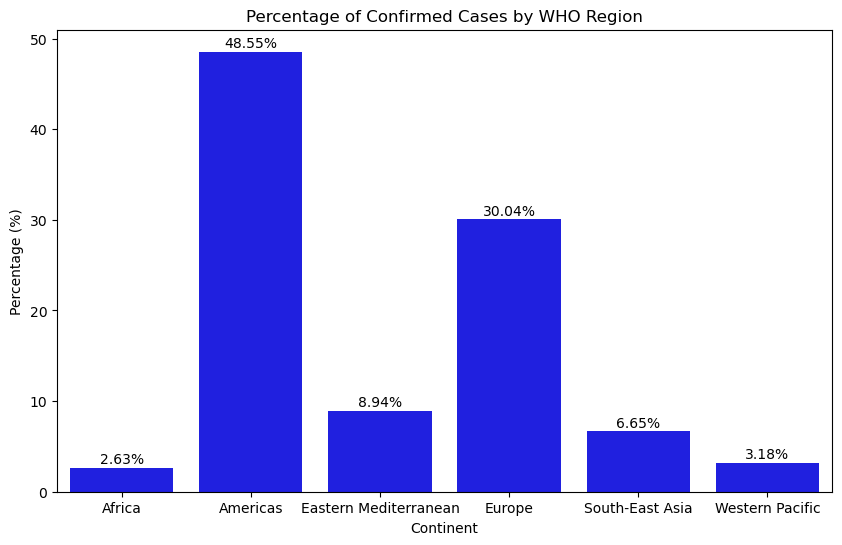

In [37]:
#Ploting the percentage of Confirmed Cases by Continent

conf_cases = cov_df.groupby('WHO Region')['Confirmed'].sum()

total = conf_cases.sum()

# Obteining the percentage
percentages_conf = (conf_cases / total) * 100

# Generating the plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=percentages_conf.index, y=percentages_conf.values, color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.2f}%', ha="center")

plt.title('Percentage of Confirmed Cases by WHO Region')
plt.xlabel('Continent')
plt.ylabel('Percentage (%)')
plt.show()

## Time Series Analysis of Confirmed cases in Europe (WHO Region)

In [16]:
# Separating the columns to be analyzed for time series and resetting index
covid_ts = cov_df[cov_df['WHO Region'] == 'Europe'].reset_index()
covid_ts.drop('index', axis=1, inplace=True)
covid_ts

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe,Europe
1,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe,Europe
2,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe,Asia
3,Austria,47.5162,14.5501,2020-01-22,0,0,0,0,Europe,Europe
4,Azerbaijan,40.1431,47.5769,2020-01-22,0,0,0,0,Europe,Asia
...,...,...,...,...,...,...,...,...,...,...
15035,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe,Unknown
15036,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe,Unknown
15037,United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe,Unknown
15038,France,46.8852,-56.3159,2020-07-27,4,0,1,3,Europe,Europe


In this data frame we are analyzing just the Europe WHO Region and we have 15040 rows and 10 columns. 

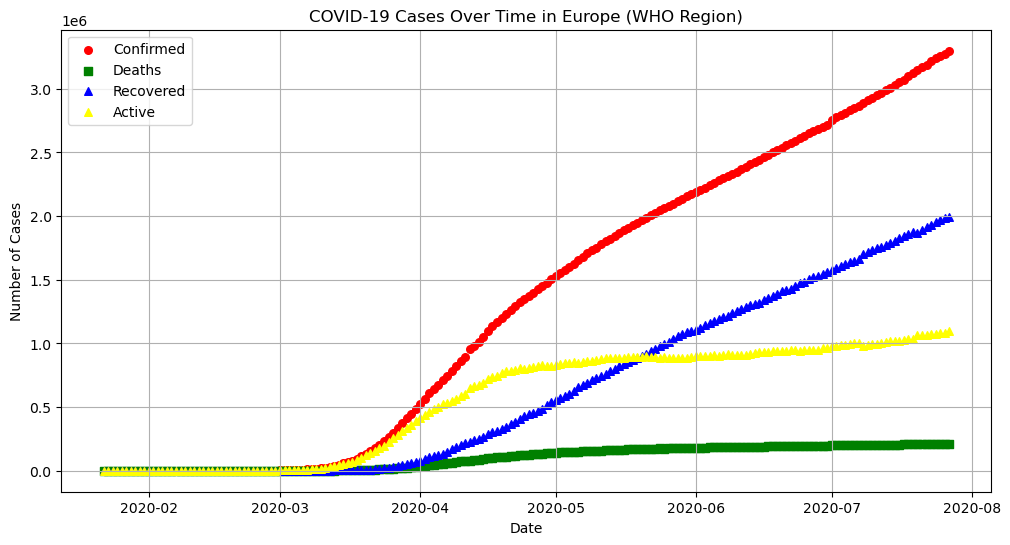

In [17]:
# Visualization of Covid-19 Cases Over Time in Europe
covid_EU = covid_ts.groupby('Date')['Confirmed','Deaths', 'Recovered', 'Active'].sum().reset_index()
covid_EU['Date'] = pd.to_datetime(covid_EU['Date'])

plt.figure(figsize=(12, 6))
plt.scatter(covid_EU['Date'], covid_EU['Confirmed'], label='Confirmed', color='red', marker='o', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Deaths'], label='Deaths', color='green', marker='s', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Recovered'], label='Recovered', color='blue', marker='^', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Active'], label='Active', color='yellow', marker='^', s=30)
plt.title('COVID-19 Cases Over Time in Europe (WHO Region)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

In this plot we can see a positive tendency line in the confirmed cases, but also we can see how was the distribution of the Covid cases Over time in Europe according to our data time provided. We can see also that until march the cases were still around 0.

In [18]:
# Loading libraries for time series plots, ACF and PACF
def plotds(xt, nlag = 60, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

The previous function generate plots of time series including ACF and PACF. Now, let's analyze the time series model with ARIMA since our data is reduced per months and we can see a clear increasing tendency line, it is better apply ARIMA instead of SARIMAX since our data is reduced in months and as we are analyzing Europe in general, we will need to aggregate all the confirmed cases in Europe according to the dates.

In [19]:
# Grouping according to the date, the confirmed cases of Covid in Europe
covid_ts = covid_ts.groupby('Date')['Confirmed'].sum().reset_index()

For applying ARIMA, first we need to add the date as an index in our dataframe

In [20]:
# Introducing the date in the correct format
covid_ts['Date'] = pd.to_datetime(covid_ts['Date'], format='%Y-%m-%d')
covid_ts.index = covid_ts['Date']
covid_ts.drop('Date', axis=1, inplace=True)
covid_ts.head()

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,2
2020-01-25,3
2020-01-26,3


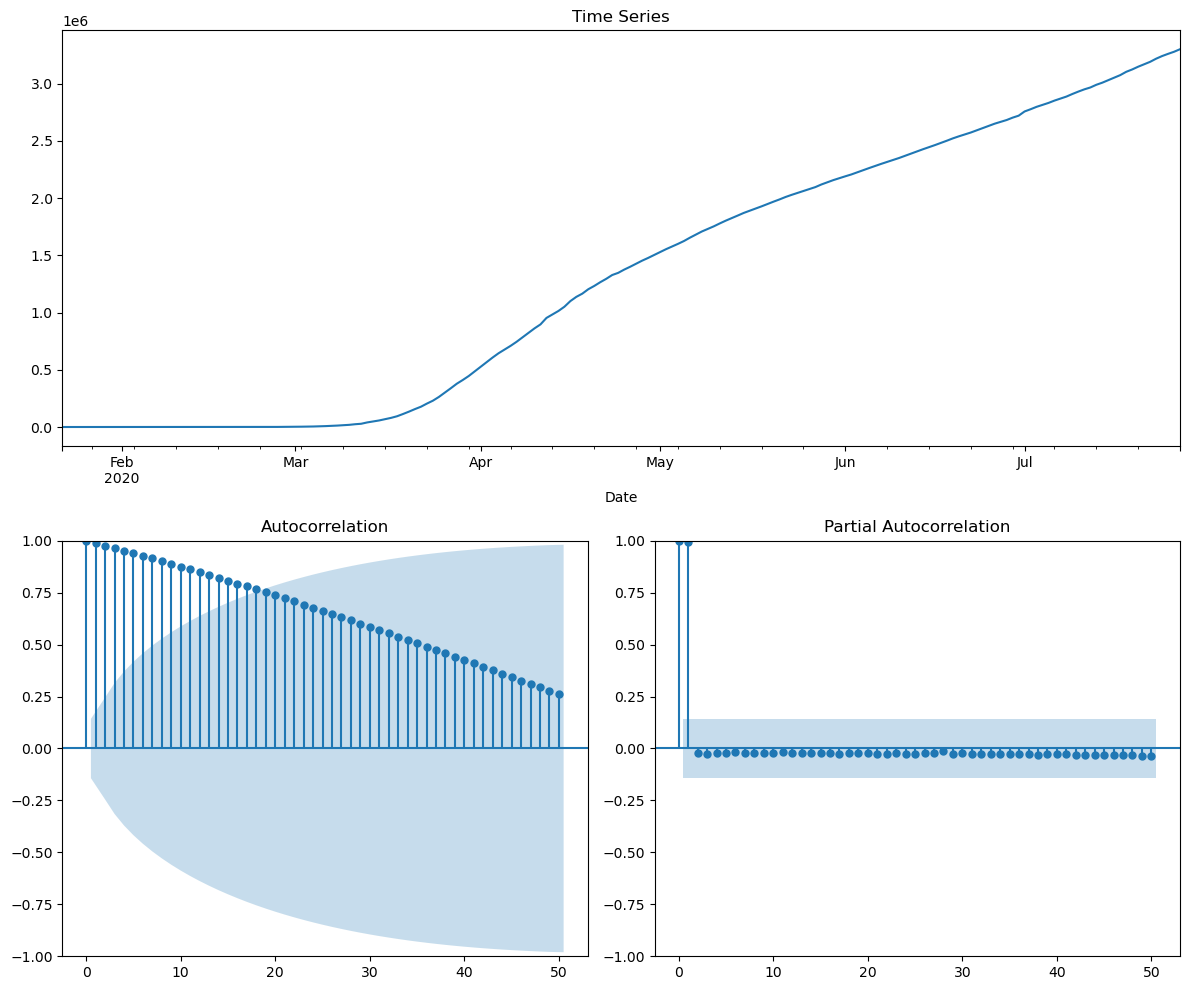

In [21]:
# Display plot of close column and Date index
plotds(covid_ts['Confirmed'], nlag = 60)

We did the previous plot to see if our data is shown as stationary, but we can see that our data is not stationary since it has an increasing trend in the first visualization where we see the months vs confirmed Covid cases, we can also see a decreasing autocorrelation and analyzing the partial autocorrelation, we can see around the first 2 lags are around 1 in the y-axes, but then we can see the following lags in negative values close to zero and we can see that there is a relationship present there.

In [22]:
# Calculating the mean and variance values of first 110 rows and afterwards
mean1, mean2 = covid_ts.iloc[:110].Confirmed.mean(), covid_ts.iloc[110:].Confirmed.mean()
var1, var2 = covid_ts.iloc[:110].Confirmed.var(), covid_ts.iloc[110:].Confirmed.var()
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 473744.545455, mean2 = 2522665.294872
variance1 = 361015356235.002563, variance2 = 190568433538.911896


We can see that the variance is changing between the first 110 rows and afterwards and we can say that the data is not stationary, and to confirm this using a mathemathical method, we will use Dickey Fuller Test

For the Dickey Fuller test, I will state the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): The time series is non-stationary

($H_A$): The time series is non-stationary

The significance level stablished by default is 0.05

In [23]:
adf_result = adfuller(covid_ts.Confirmed.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.190170
p-value: 0.939683


Applying Dickey Fuller Test, we can see that the p value is more than 0.05; so, we reject the null hypothesis, and we can say that our dataset is non-stationary.

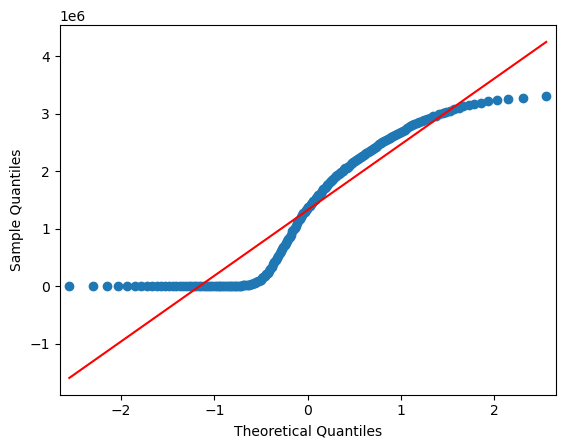

In [24]:
# Showing the qqplot for 'Confirmed' cases of Covid
x = sm.qqplot(covid_ts['Confirmed'], line = 's')

We are looking the quartile distribution in the previous graphic, and it is based in the quartiles of the x-axes in which at the beginning we can see many values that remain constant close to zero and then start increasing.

As our data does't show too much seasonality, let's apply ARIMA model in the dataset to compare the values and make it stationary

## ARIMA Time Series Model splitting 15% for testing and 85% for training

In [25]:
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(covid_ts) * 0.85)
train, test = covid_ts[:train_size], covid_ts[train_size:]
model = ARIMA(train['Confirmed'], order = (1, 1, 0))
results_AR = model.fit()

We are gonna analyze the recovered cases adding p,q, and d in which p is 1 which means the autoregression, 1 as q that is the difference and 0 as moving average, and the next function finds how many differences we should apply to make the data stationary for our ARIMA model.

In [26]:
#Applying function to find the number of differences to apply to make the data stationary
analysis = train['Confirmed']
def adf_test(analysis):
    result = adfuller(analysis, autolag='AIC')
    p_value = result[1]
    return p_value
d = 0
significance_level = 0.05
while True:
    p_value = adf_test(analysis.diff(d).dropna())
    if p_value < significance_level:
        break
    d += 1
print(f"Number of differences to make the series stationary: {d}")

Number of differences to make the series stationary: 31


In [27]:
# Applying the order of differences to make the data stationary
order_diff = train['Confirmed'].diff(31)
order_diff = train['Confirmed'].diff(31).dropna()
order_diff.head()

Date
2020-02-22    121.0
2020-02-23    219.0
2020-02-24    293.0
2020-02-25    400.0
2020-02-26    565.0
Name: Confirmed, dtype: float64

Text(0.5, 1.0, 'Order differences of DJIA during Feb 2020-June 2020')

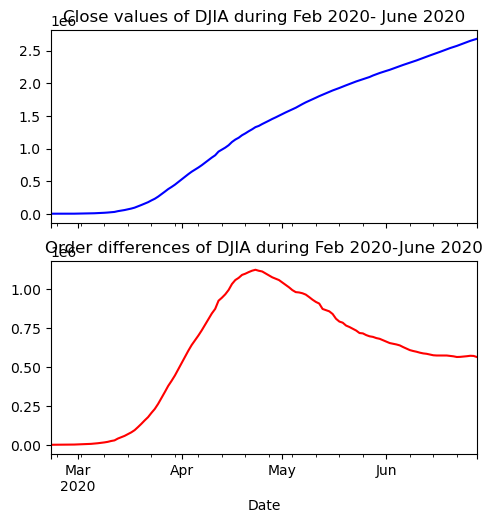

In [28]:
# Visualizing the previous data non stationary with the new one
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
train['Confirmed'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Feb 2020- June 2020')
order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('Order differences of DJIA during Feb 2020-June 2020')

As our data had a continuous increasing tendency we could only see if the data is stationary applying Dickey Fuller test again in which the nlags stablished are 60 since we are working in monthly data.

For the Dickey Fuller test, I will state the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): The time series is non-stationary

($H_A$): The time series is non-stationary

The significance level stablished by default is 0.05

ADF Statistic: -2.867485
p-value: 0.049262


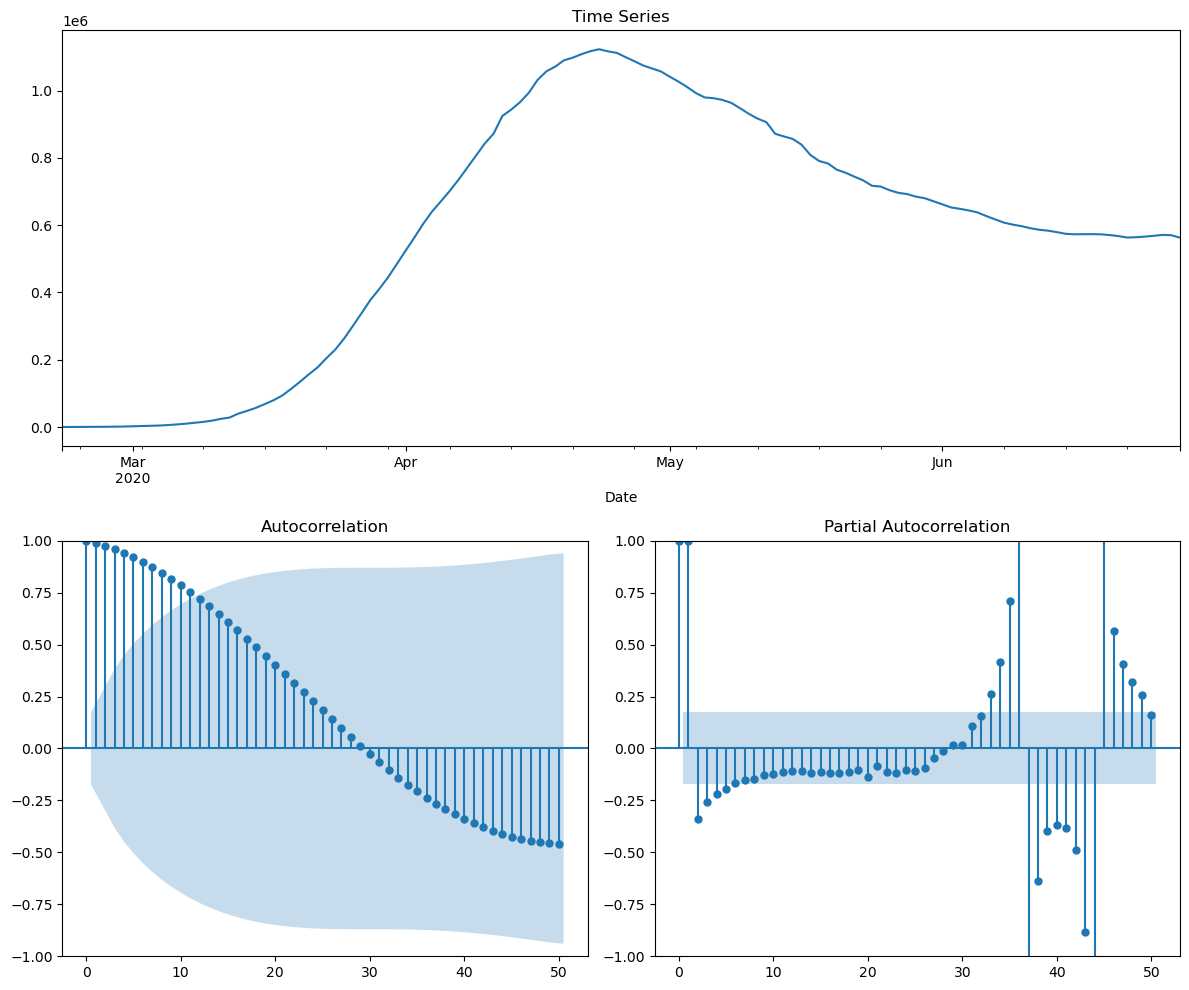

In [29]:
plotds(order_diff, nlag = 60)
adf_result = adfuller(order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

Now applying the Dickey Fuller Test, we can see that our data is considered stationary 

Now we are going to find which is the best combination for p, d, q, and we are going to train the values with different combinations

In [30]:
# Funtion for applying nested loop to define AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(train['Confirmed'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 3605.273975006168], [0, 1, 1, 3440.0663127686066], [0, 1, 2, 3325.8846817659305], [1, 1, 0, 3087.2326557369656], [1, 1, 1, 3050.6552669597004], [1, 1, 2, 3052.4544952245906], [2, 1, 0, 3060.6674797927717], [2, 1, 1, 3052.3512218895094], [2, 1, 2, 3054.3978043810303], [0, 2, 0, 103313.3296774092], [0, 2, 1, 3030.0096767136274], [0, 2, 2, 3031.853873017359], [1, 2, 0, 3040.47078218187], [1, 2, 1, 3031.6318529756873], [1, 2, 2, 3033.8673886455144], [2, 2, 0, 3034.376366087702], [2, 2, 1, 3032.473243358303], [2, 2, 2, 3004.802459407722]]


The best combination is (2,2,2) because it has the small value according to the AIC values, and now let's train the model with the optimal values.

In [31]:
# Applying the optimal p, d and q in the ARIMA model
arima_obj = ARIMA(train['Confirmed'].tolist(), order = (2, 2, 2))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  159
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1497.401
Date:                Sat, 28 Oct 2023   AIC                           3004.802
Time:                        20:12:49   BIC                           3020.084
Sample:                             0   HQIC                          3011.009
                                - 159                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9639      0.038     25.500      0.000       0.890       1.038
ar.L2         -0.3736      0.041     -9.061      0.000      -0.454      -0.293
ma.L1         -1.6899      0.042    -40.074      0.000      -1.773      -1.607
ma.L2          1.0000      0.053     18.856      0.000       0.896       1.104
sigma2      1.078e+07   8.07e-09   1.34e+15      0.000    1.08e+07    1.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               672.20
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.01e+29. Standard errors may be unstable.
"""

AIC tells us how accurate we are in our model with this pdq combination, and BIC give us information criterium about the dataset, and in the next code we will train again our ARIMA model.

In [32]:
# Showing in a dataframe the Confirmed cases, ARIMA and diffval 
pred = arima_obj_fit.fittedvalues
train['ARIMA'] = pred
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues
train['diffval'] = diffval
train.head()

,Confirmed,ARIMA,diffval
Date,,,
2020-01-22,0,0.000000,0.0
2020-01-23,0,0.000000,0.0
2020-01-24,2,0.000000,2.0
2020-01-25,3,2.949791,3.0
2020-01-26,3,3.743160,3.0


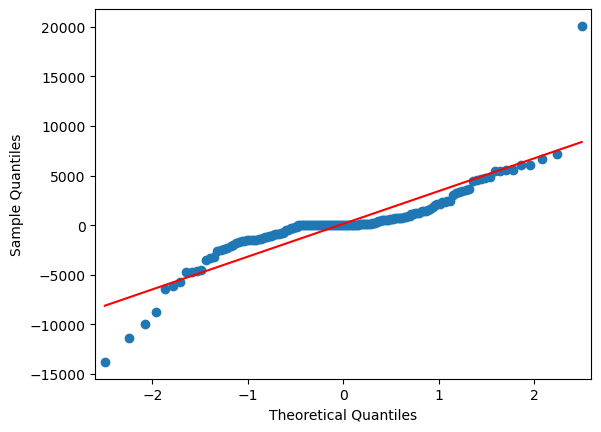

In [33]:
# Showing the new qqplot
x = sm.qqplot(arima_obj_fit.resid, line = 's')

We can see that now our data fits better into our ARIMAmodel with the new parameters stablished

In [34]:
print(train['diffval'], train['ARIMA'])

Date
2020-01-22          0.0
2020-01-23          0.0
2020-01-24          2.0
2020-01-25          3.0
2020-01-26          3.0
                ...    
2020-06-24    2610439.0
2020-06-25    2629250.0
2020-06-26    2649366.0
2020-06-27    2665549.0
2020-06-28    2681253.0
Name: diffval, Length: 159, dtype: float64 Date
2020-01-22    0.000000e+00
2020-01-23    0.000000e+00
2020-01-24    0.000000e+00
2020-01-25    2.949791e+00
2020-01-26    3.743160e+00
                  ...     
2020-06-24    2.610327e+06
2020-06-25    2.629024e+06
2020-06-26    2.647495e+06
2020-06-27    2.667947e+06
2020-06-28    2.683329e+06
Name: ARIMA, Length: 159, dtype: float64


Text(0, 0.5, 'Closing')

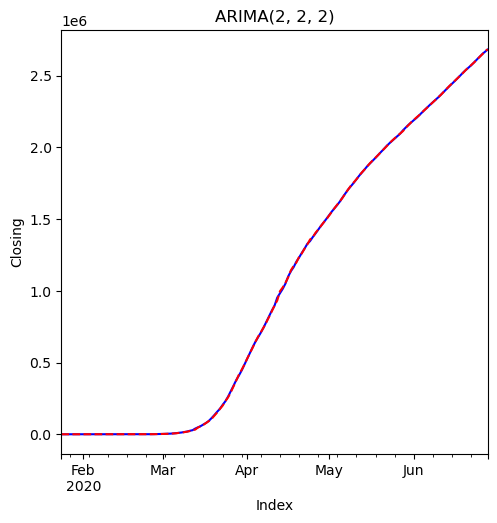

In [35]:
# Showint the ARIMA model with the new p, d, q values
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)
train['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
train['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 2, 2)')
plt.xlabel('Index')
plt.ylabel('Closing')

We can see now how our ARIMA model is working in the dataset, if we split between confidence intervals, we can see the next results

In [36]:
# Calculating the r-squared error for the testing set
test_predictions = arima_obj_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
from sklearn.metrics import r2_score, mean_absolute_error
test_r2 = r2_score(test['Confirmed'], test_predictions)
print("Test R-squared:", test_r2)
test_MAE = mean_absolute_error(test['Confirmed'], test_predictions)
print("Mean Absolute Error (MAE):", test_MAE)

Test R-squared: 0.803516332469697
Mean Absolute Error (MAE): 67052.63261174184


We can see that appying the R-squared test in our tested data, we get 80.34%, and a Mean Squared Error of 67070 which are good values and we can say that we have a good model. However, this model was reduced due to the dates in our data that were the same dates for Europe, and that is why we are going to perform other Machine Learning Models for the prediction.